In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re

data = pd.read_csv(f'../data/02_Student_Mental_Health_2021-10-10.csv')

In [78]:
print(f'{data.shape[1]}col  x {data.shape[0]} row')

147col  x 1659 row


In [79]:
columns_to_save = ['Age', 'Gender', 'Ethnicity', 'Sex', 'Program', 'Disability', 'Province', 'Hobbies_Time_1', 'Hours_sleep', 'Rested', 'Mindfulness_freq', 'Diagnosis', 'Diagnosis_text']

In [80]:
data = data[columns_to_save]
data

,Age,Gender,Ethnicity,Sex,Program,Disability,Province,Hobbies_Time_1,Hours_sleep,Rested,Mindfulness_freq,Diagnosis,Diagnosis_text
0,18.0,2.0,2.0,2.0,7.0,2.0,5.0,1.0,4.0,2.0,1.0,2.0,NaN
1,18.0,2.0,1.0,2.0,8.0,2.0,1.0,1.0,5.0,2.0,3.0,1.0,"Anxiety, panic disorder"
2,18.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,anxiety and depression
3,19.0,2.0,1.0,2.0,3.0,2.0,2.0,1.0,5.0,2.0,2.0,1.0,"Anxiety, OCD"
4,18.0,2.0,1.0,2.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,"bipolar with psychotic depressive features, ad..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
MAX_NOMINAL_VALUES = 100
GLOBAL_MISSING = []

In [82]:
def clean_numerical_column(col):
    col = col.replace('Unknown', np.nan)
    col = col.replace('nan', np.nan)
    col = col.replace('Personal', np.nan)
    col = col.replace(r'[^0-9.+-]', '', regex=True)

    col = pd.to_numeric(col, errors='coerce')

    return col

In [83]:
def clean_categorical_text(text, correction_dict):
    text = str(text).lower()

    for a, b in correction_dict.items():
        text = re.sub(r'\b' + re.escape(a) + r'\b', b, text)

    return text

In [90]:
def clean_diagnosis_raw(text):
    text = str(text).lower()
    text = text.replace('and', ',')
    text = text.replace('&', ',')
    text = text.replace('/', ',')
    text = text.split(',')
    
    for i in range(len(text)):
        if re.search(r'.*borderline.*', text[i]):
            text[i] = 'bpd'
            
        if re.search(r'.*substance abuse.*', text[i]):
            text[i] = 'addiction' 

        if re.search(r'.*bi[-]?polar.*', text[i]):
            text[i] = 'bipolar'
            
        if re.search(r'.*depressi.*', text[i]):
            text[i] = 'depression'
            
        if re.search(r'.*mdd.*', text[i]):
            text[i] = 'depression'
            
        if re.search(r'.*social.*', text[i]):
            text[i] = 'social'
        
        if re.search(r'.*obsessive compulsive.*', text[i]):
            text[i] = 'ocd'
            
        if re.search(r'.*autism.*', text[i]):
            text[i] = 'asd' 
            
        if re.search(r'.*anxiety.*', text[i]):
            text[i] = 'anxiety'
            
        if re.search(r'.*gad.*', text[i]):
            text[i] = 'anxiety'

        if re.search(r'.*premenstrual.*', text[i]):
            text[i] = 'pmdd'
            
        if re.search(r'.*eating disorder.*', text[i]):
            text[i] = 'pad'
            
        if re.search(r'.*anorexia.*', text[i]):
            text[i] = 'anorexia'

        if re.search(r'.*attention defficit.*', text[i]):
            text[i] = 'adhd'
            
        if re.search(r'.*adhd.*', text[i]):
            text[i] = 'adhd'
            
        if re.search(r'.*add.*', text[i]):
            text[i] = 'adhd'
            
        if re.search(r'.*asperger.*', text[i]):
            text[i] = 'autism'
            
        if re.search(r'.*post[-]?traumatic.*', text[i]):
            text[i] = 'ptsd'
            
        if re.search(r'.*dissiociative disorder.*', text[i]):
            text[i] = 'udd'

        if re.search(r'.*dermatilomania.*', text[i]):
            text[i] = 'ocd'
            
        if re.search(r'.*trichotillomania.*', text[i]):
            text[i] = 'ocd'
            
        if re.search(r'.*phobia.*', text[i]):
            text[i] = 'phobia'
            
        
    return text

In [91]:
def clean_diagnosis(data, col):
    data[col] = data[col].apply(clean_diagnosis_raw)

In [92]:
data['Diagnosis_text']

0                                                     NaN
1                                 Anxiety, panic disorder
2                                  anxiety and depression
3                                            Anxiety, OCD
4       bipolar with psychotic depressive features, ad...
                              ...                        
1654                                                  NaN
1655                                                  NaN
1656                                                  NaN
1657                                                  NaN
1658                                                  NaN
Name: Diagnosis_text, Length: 1659, dtype: object

In [93]:
data_tmp = data.copy()
col = clean_diagnosis(data_tmp, 'Diagnosis_text')
data_tmp['Diagnosis_text'] 


0                            [nan]
1       [anxiety,  panic disorder]
2            [anxiety, depression]
3                  [anxiety,  ocd]
4         [bipolar, adhd, anxiety]
                   ...            
1654                         [nan]
1655                         [nan]
1656                         [nan]
1657                         [nan]
1658                         [nan]
Name: Diagnosis_text, Length: 1659, dtype: object

In [9]:
def plot_numerical_pie(data, col, labels):
    data['label'] = data[col].map(labels)

    label_counts = data['label'].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'{col}')
    plt.show()

In [10]:
def plot_numerical_histogram(data, col):
    #histo = data[col].value_counts()

    plt.figure(figsize=(8, 8))
    plt.hist(data[col].dropna(), bins=20)
    plt.title(f'{col}')
    plt.grid(True)
    plt.show()

In [11]:
a = {}
print(str(len(a)))

0


In [12]:
def check_numerical_df(df):
    return df.select_dtypes(include=['int', 'float']).columns.shape[0] == df.columns.shape[0]

In [13]:
data.shape[0]

1659

## Ethnicity

In [14]:
ethnicity_dict = {
    1: "Caucasian",
    2: "Asian",
    3: "Indigenous",
    4: "Hispanic or Latino",
    5: "Black",
    6: "Other",
    7: "Metis"
}

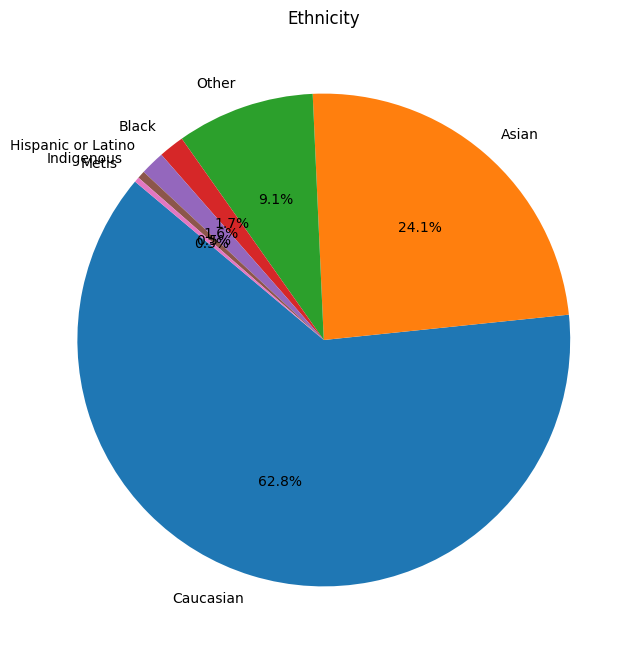

In [15]:
plot_numerical_pie(data, 'Ethnicity', ethnicity_dict)

## Sex 

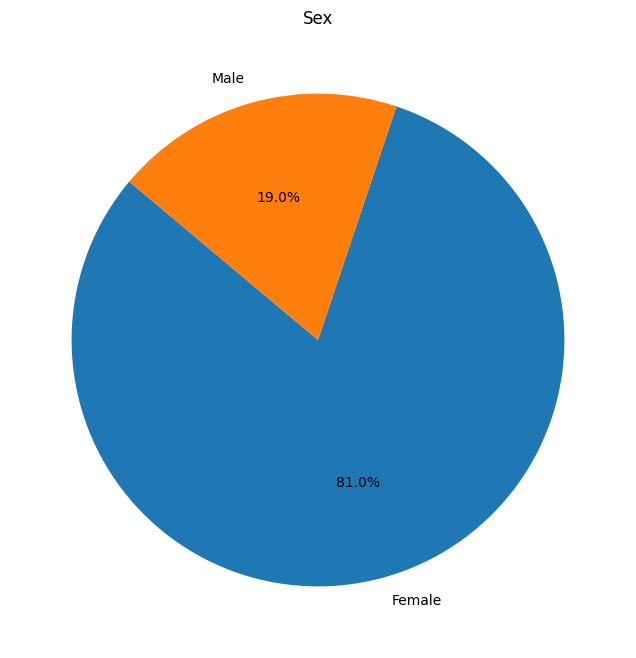

In [16]:
sex_dict = {
    1: "Male",
    2: "Female",
    3: "intersex",
}
plot_numerical_pie(data, 'Sex', sex_dict)


## Gender 

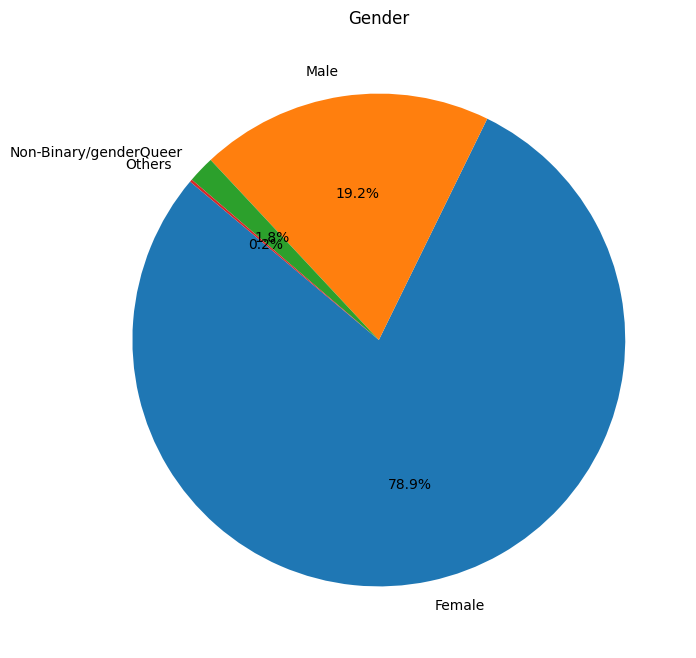

In [17]:
gender_dict = {
    1: "Male",
    2: "Female",
    3: "Non-Binary/genderQueer",
    12: "Others"
}
plot_numerical_pie(data, 'Gender', gender_dict)


## Program

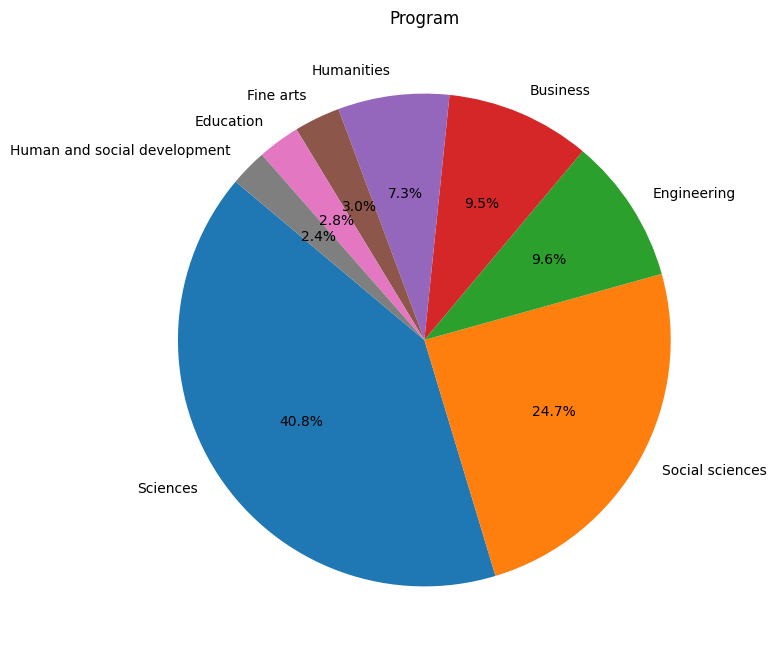

In [18]:
program_dict = {
    1: "Business",
    2: "Education",
    3: "Engineering",
    4: "Fine arts",
    5: "Human and social development",
    6: "Humanities",
    7: "Sciences",
    8: "Social sciences",
}
plot_numerical_pie(data, 'Program', program_dict)


## Disability

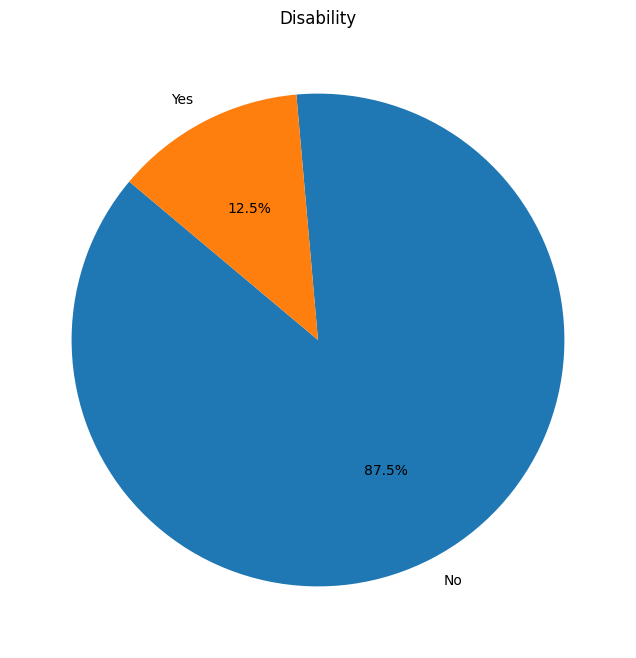

In [19]:
disability_dict = {
    1: "Yes",
    2: "No",
    3: "Prefer to not answer",
}
plot_numerical_pie(data, 'Disability', disability_dict)


## Province

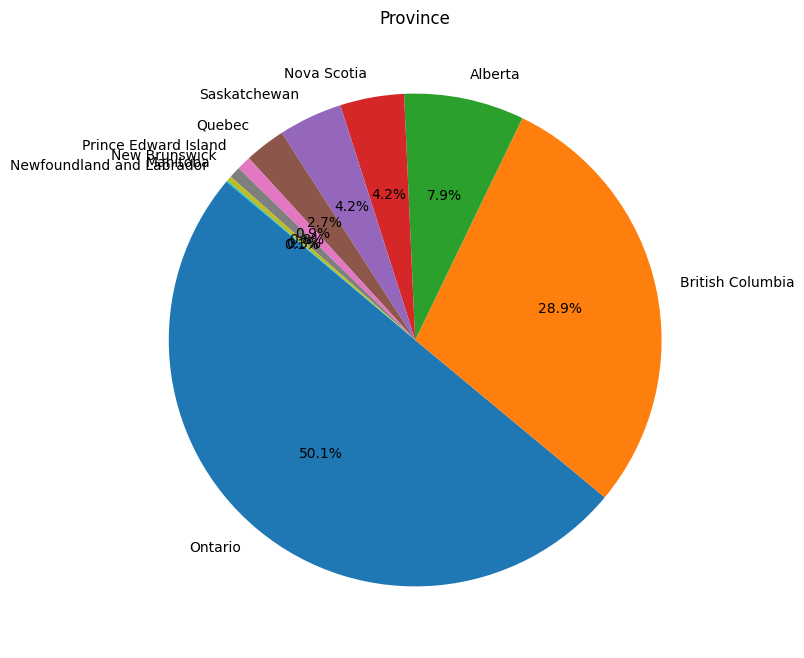

In [20]:
province_dict = {
    1: "British Columbia",
    2: "Alberta",
    3: "Saskatchewan",
    4: "Manitoba",
    5: "Ontario",
    6: "Quebec",
    7: "New Brunswick",
    8: "Newfoundland and Labrador",
    9: "Nova Scotia",
    10: "Prince Edward Island",
    11: "Yukon",
    12: "Northwest Territory",
    13: "Nunavut",
}
plot_numerical_pie(data, 'Province', province_dict)


## Hours of sport

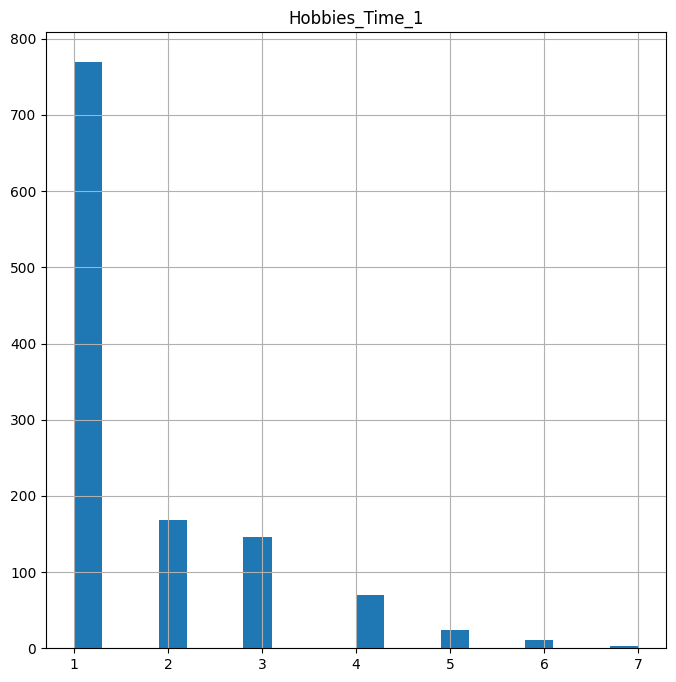

In [22]:
plot_numerical_histogram(data, 'Hobbies_Time_1')


## Hours of sleep

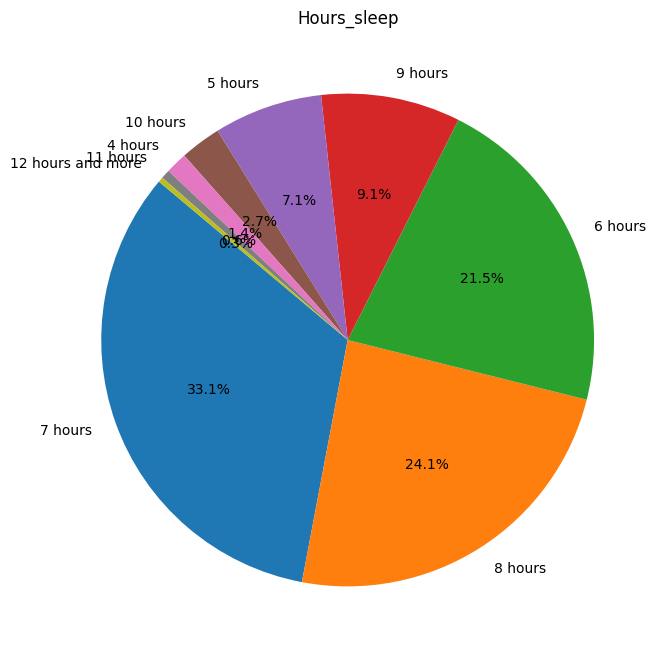

In [25]:

hours_sleep_dict = {
    1: "4 hours",
    2: "5 hours",
    3: "6 hours",
    4: "7 hours",
    5: "8 hours",
    6: "9 hours",
    7: "10 hours",
    8: "11 hours",
    9: "12 hours and more"
}

plot_numerical_pie(data, 'Hours_sleep', hours_sleep_dict)

## Rested

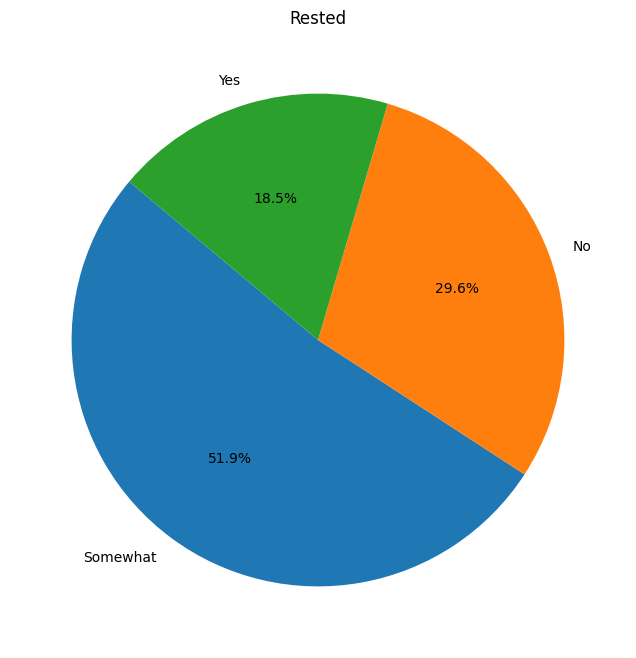

In [26]:
rested_dict = {
    1: "Yes",
    2: "Somewhat",
    3: "No",
}

plot_numerical_pie(data, 'Rested', rested_dict)


## mindfulness

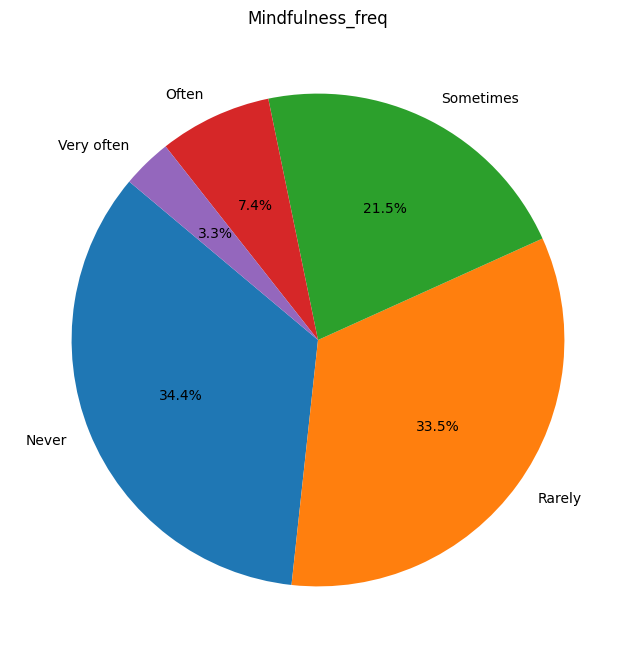

In [28]:
mindfulness_dict = {
    1: "Never",
    2: "Rarely",
    3: "Sometimes",
    4: "Often",
    5: "Very often",
}

plot_numerical_pie(data, 'Mindfulness_freq', mindfulness_dict)


## Diagnosis

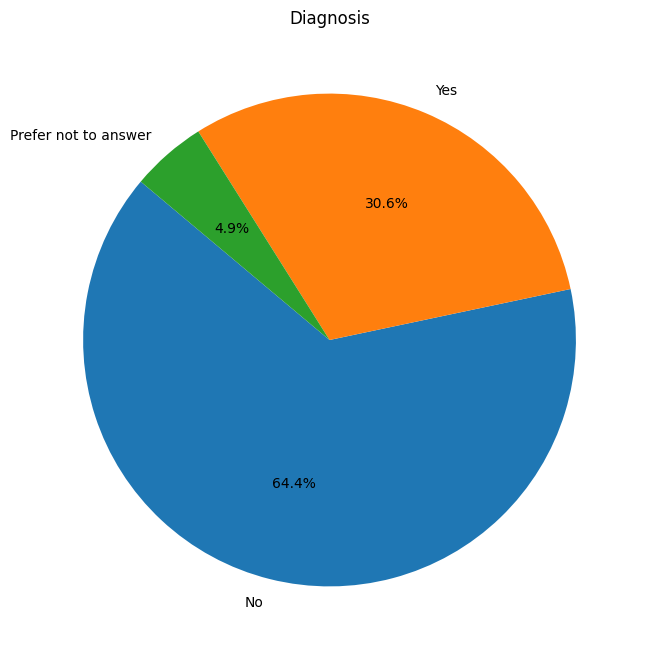

In [33]:
diagnosis_dict = {
    1: "Yes",
    2: "No",
    3: "Prefer not to answer",
}

plot_numerical_pie(data, 'Diagnosis', diagnosis_dict)
